## Importing Libraries

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

## Read the Data

In [2]:
# read the data
df = pd.read_csv("INR=X.csv")
# display first five rows of dataframe
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


## Understanding the Data

In [3]:
# display the number of rows and columns in the dataframe
df.shape

(262, 7)

In [4]:
# show information on the column and their types and data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [5]:
# check for null values in the dataset
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# show basic statistics about the dataframe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


In [7]:
# show if there are any duplicate values in the dataframe
df.duplicated().sum()

0

## Exploratory Data Analysis

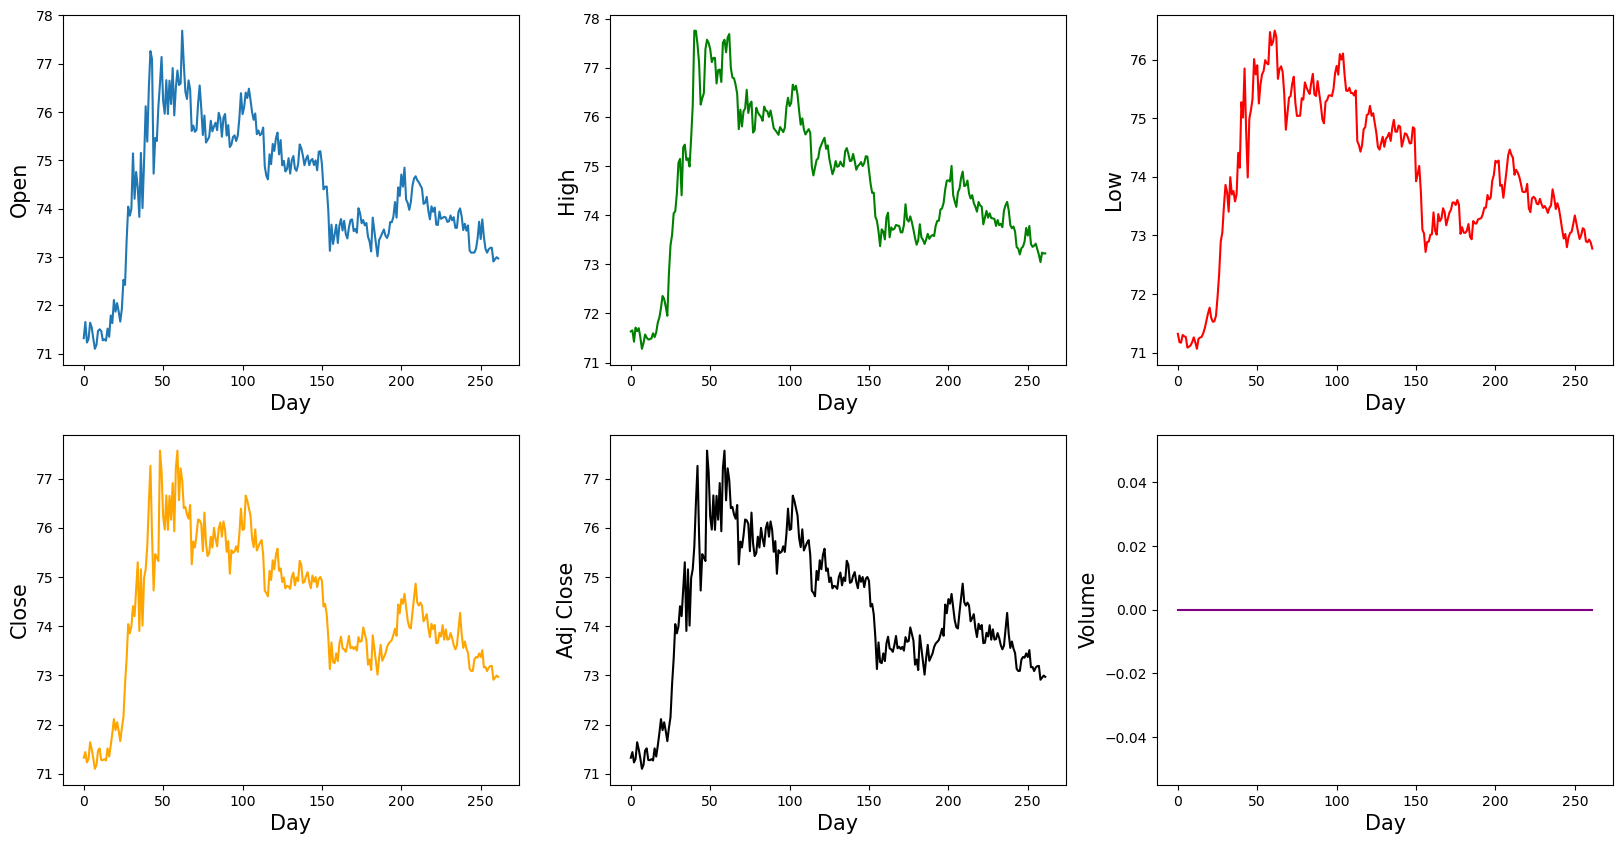

In [8]:
# create multiple axes of the figure with 2 rows and 3 columns to show multiple graphs
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

# on the first axis, create a line chart of Open column
ax1.plot(df['Open'])
ax1.set_xlabel("Day", fontsize=15)
ax1.set_ylabel("Open", fontsize=15)

# on the second axis, create a line chart of High column
ax2.plot(df['High'], color='green')
ax2.set_xlabel("Day", fontsize=15)
ax2.set_ylabel("High", fontsize=15)

# on the third axis, create a line chart of Low column
ax3.plot(df['Low'], color='red')
ax3.set_xlabel("Day", fontsize=15)
ax3.set_ylabel("Low", fontsize=15)

# on the fourth axis, create a line chart of Close column
ax4.plot(df['Close'], color='orange')
ax4.set_xlabel("Day", fontsize=15)
ax4.set_ylabel("Close", fontsize=15)

# on the fifth axis, create a line chart of Adj Close column
ax5.plot(df['Adj Close'], color='black')
ax5.set_xlabel("Day", fontsize=15)
ax5.set_ylabel("Adj Close", fontsize=15)

# on the sixth axis, create a line chart of Volume column
ax6.plot(df['Volume'], color='purple')
ax6.set_xlabel("Day", fontsize=15)
ax6.set_ylabel("Volume", fontsize=15)

# display the figure
plt.show()

## Data Preprocessing

In [9]:
# drop Date column and update the dataframe
df.drop(['Date'], axis = 1, inplace = True)
# show first five rows of the dataframe
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [10]:
# creating  a standard scaler object
std = StandardScaler()
# scaling the dataframe so that the features or variables get standardized or normalized, which has mean of 0 and standard deviation of 1
df = std.fit_transform(df)

In [11]:
# create a new dataframe from the standardized dataframe, this new dataframe will be used ahead now.
new_df = pd.DataFrame(df)
# show first five rows of the dataframe
new_df.head()

,0,1,2,3,4,5
0,-2.158109,-2.008550,-2.056080,-2.130978,-2.130978,0.0
1,-1.921345,-1.995144,-2.164573,-2.050189,-2.050189,0.0
2,-2.221644,-2.149331,-2.171830,-2.197431,-2.197431,0.0
3,-2.172242,-1.956932,-2.071358,-2.148536,-2.148536,0.0
4,-1.931947,-2.005200,-2.088555,-1.909695,-1.909695,0.0


In [12]:
# give column names to the dataframe
new_df.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
# show first five rows of the dataframe
new_df.head()

,Open,High,Low,Close,Adj Close,Volume
0,-2.158109,-2.008550,-2.056080,-2.130978,-2.130978,0.0
1,-1.921345,-1.995144,-2.164573,-2.050189,-2.050189,0.0
2,-2.221644,-2.149331,-2.171830,-2.197431,-2.197431,0.0
3,-2.172242,-1.956932,-2.071358,-2.148536,-2.148536,0.0
4,-1.931947,-2.005200,-2.088555,-1.909695,-1.909695,0.0


In [13]:
# create target variable
Y = new_df["Close"]
# create learning parameters variable
X = new_df.drop(["Close"], axis=1)

In [14]:
# show first five rows of the learning variables
X.head()

,Open,High,Low,Adj Close,Volume
0,-2.158109,-2.008550,-2.056080,-2.130978,0.0
1,-1.921345,-1.995144,-2.164573,-2.050189,0.0
2,-2.221644,-2.149331,-2.171830,-2.197431,0.0
3,-2.172242,-1.956932,-2.071358,-2.148536,0.0
4,-1.931947,-2.005200,-2.088555,-1.909695,0.0


## Splitting Data for Training and Testing

In [15]:
# split the dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [16]:
# create empty lists that will append ML models scores later
r2_scores = []
mean_squared_errors = []
mean_absolute_errors = []

## Machine Learning Models

#### Random Forest Regressor

In [17]:
# create a random forest regressor object
rf = RandomForestRegressor(n_estimators = 5)
# train the data on the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5)

In [18]:
# make predictions on the test data
y_pred = rf.predict(X_test)

# calculate the R^2 score, mse and mae to evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# append the scores to the list created earlier
r2_scores.append(r2)
mean_squared_errors.append(mse)
mean_absolute_errors.append(mae)

# display the scores
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 Score: 0.9989148962129688
Mean Absolute Error (MAE): 0.020799233896224057
Mean Squared Error (MSE): 0.0010758705413743104


#### Decision Tree Regressor

In [19]:
# create a decision tree regressor object
dt = DecisionTreeRegressor()
# train the model on the training dataset
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
# make predictions on the test data
y_pred = dt.predict(X_test)

# calculate the R^2 score, mse and mae to evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# append the scores to the list created earlier
r2_scores.append(r2)
mean_squared_errors.append(mse)
mean_absolute_errors.append(mae)

# display the scores
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 Score: 0.9993142550671978
Mean Absolute Error (MAE): 0.016974682296495354
Mean Squared Error (MSE): 0.000679909867531659


#### K-Nearest Neighbors

In [21]:
# create a K-nearest neighbors object
knn = KNeighborsRegressor()
# fit training data to the knn object to train it
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [22]:
# make predictions on the test data
y_pred = knn.predict(X_test)

# calculate the R^2 score, mae and mse to evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# append the scores to the list created earlier
r2_scores.append(r2)
mean_squared_errors.append(mse)
mean_absolute_errors.append(mae)

# display the scores
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 Score: 0.9948538075484396
Mean Absolute Error (MAE): 0.04770174114733589
Mean Squared Error (MSE): 0.005102403037431727


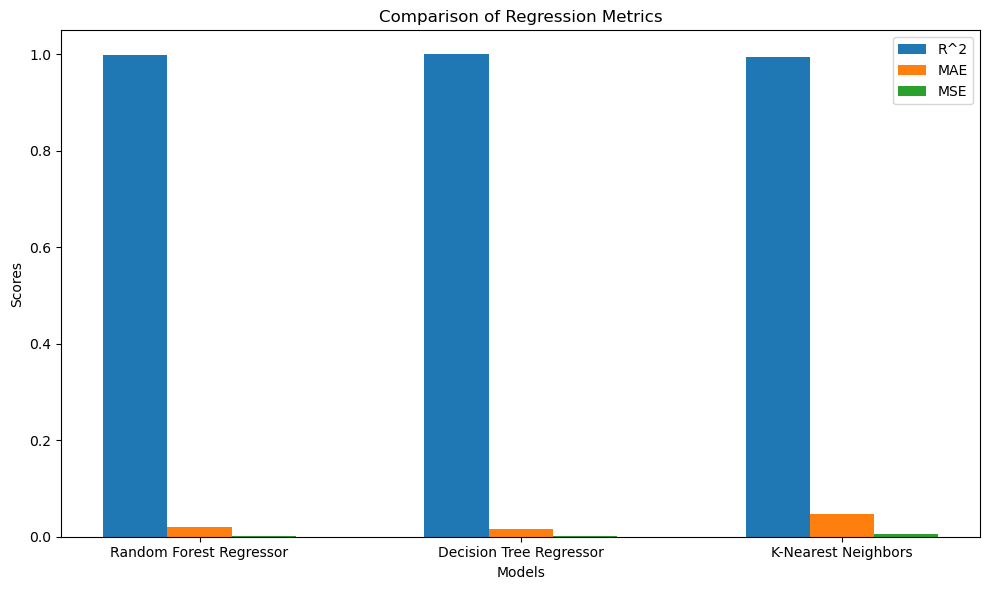

In [23]:
# define the labels for the models
models = ['Random Forest Regressor', 'Decision Tree Regressor', 'K-Nearest Neighbors']

# define the positions of the bars on the x-axis
x = np.arange(len(models))

# set the width of the bars
width = 0.2

# create a figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# create bars for R^2, MAE, and MSE
r2_bars = ax.bar(x - width, r2_scores, width, label='R^2')
mae_bars = ax.bar(x, mean_absolute_errors, width, label='MAE')
mse_bars = ax.bar(x + width, mean_squared_errors, width, label='MSE')

# set labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# display the plot
plt.tight_layout()
plt.show()

Out of all, Decision Tree Regressor and Random Forest Regressor performed better with minimal difference, but still Decision Tree Classifier outperformed with a insignificant margin.